In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
sales_data = pd.read_csv('/content/sales_train.csv')
print(sales_data.head())


         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013             0.0     59.0  22154.0      999.00           1.0
1  03.01.2013             0.0     25.0   2552.0      899.00           1.0
2  05.01.2013             0.0     25.0   2552.0      899.00          -1.0
3  06.01.2013             0.0     25.0   2554.0     1709.05           1.0
4  15.01.2013             0.0     25.0   2555.0     1099.00           1.0


In [6]:
missing_values = sales_data.isnull().sum()

## 2. Check for duplicates
duplicates = sales_data.duplicated().sum()

## 3. Handle negative values for item_price (replace with NaN)
sales_data['item_price'] = sales_data['item_price'].apply(lambda x: np.nan if x < 0 else x)

## 4. Remove rows with negative item_cnt_day (returns or erroneous data)
sales_data = sales_data[sales_data['item_cnt_day'] > 0]

# Data Overview
print(f"Missing values:\n{missing_values}\n")
print(f"Basic statistics:\n{sales_data.describe()}\n")
print(f"Duplicate rows: {duplicates}\n")


Missing values:
date              0
date_block_num    1
shop_id           1
item_id           1
item_price        1
item_cnt_day      1
dtype: int64

Basic statistics:
       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    1.414873e+06  1.414873e+06  1.414873e+06  1.414872e+06  1.414873e+06
mean     6.247086e+00  3.226253e+01  1.015368e+04  7.402092e+02  1.234868e+00
std      3.992610e+00  1.627817e+01  6.320802e+03  1.340461e+03  1.628192e+00
min      0.000000e+00  0.000000e+00  1.200000e+01  7.000000e-02  1.000000e+00
25%      3.000000e+00  2.100000e+01  4.373000e+03  1.990000e+02  1.000000e+00
50%      6.000000e+00  3.000000e+01  9.368000e+03  3.990000e+02  1.000000e+00
75%      1.000000e+01  4.600000e+01  1.553000e+04  7.990000e+02  1.000000e+00
max      1.300000e+01  5.900000e+01  2.216800e+04  3.079800e+05  2.880000e+02

Duplicate rows: 1



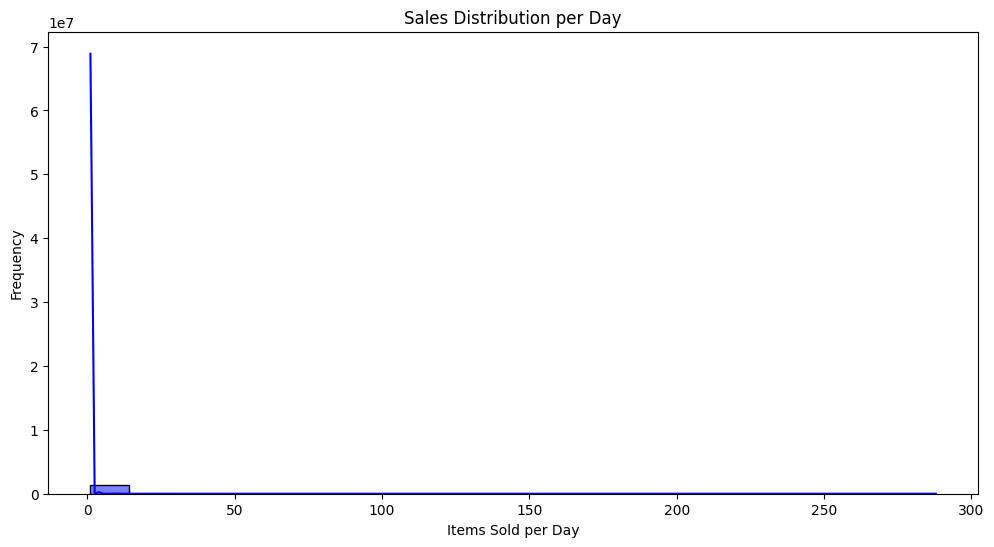

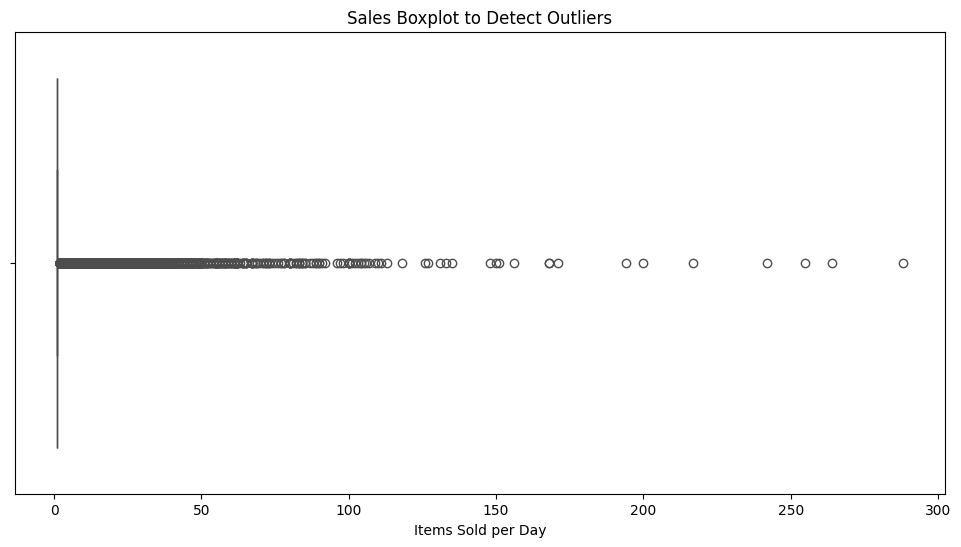

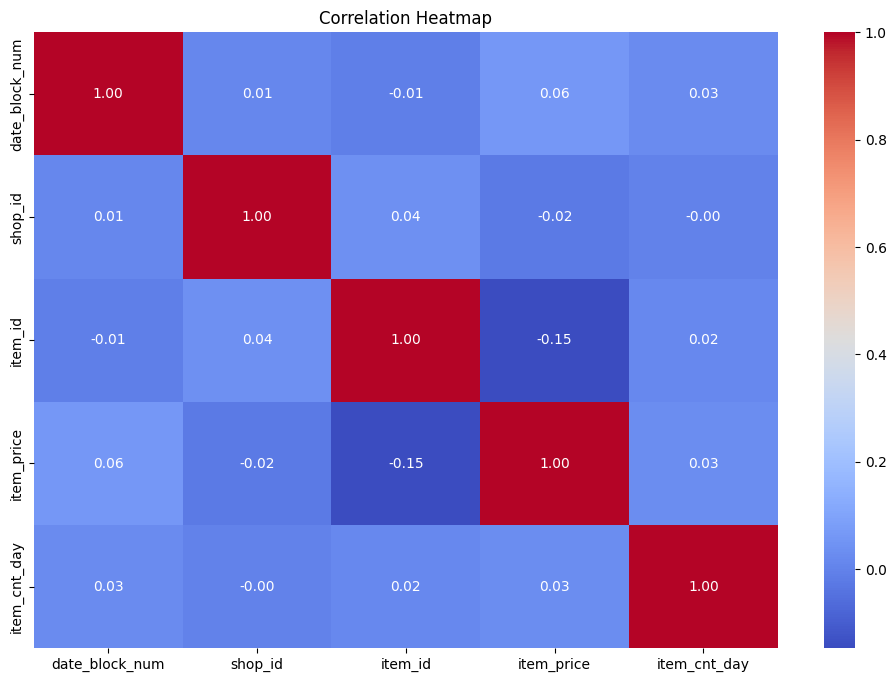

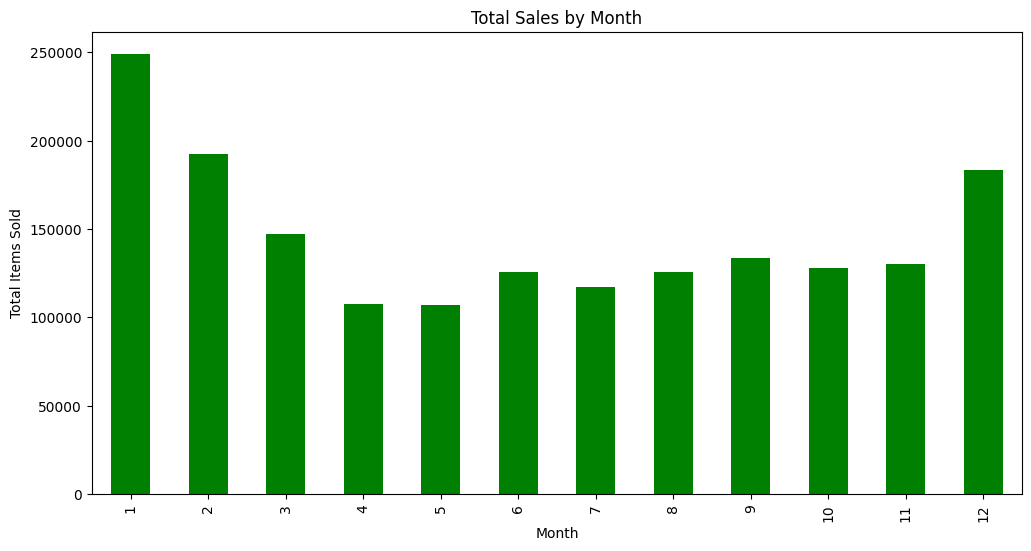

In [8]:
# Visualizations

## 1. Sales distribution visualization
plt.figure(figsize=(12,6))
sns.histplot(sales_data['item_cnt_day'], kde=True, color='blue')
plt.title('Sales Distribution per Day')
plt.xlabel('Items Sold per Day')
plt.ylabel('Frequency')
plt.show()

## 2. Boxplot for sales (to detect outliers)
plt.figure(figsize=(12,6))
sns.boxplot(x=sales_data['item_cnt_day'], color='orange')
plt.title('Sales Boxplot to Detect Outliers')
plt.xlabel('Items Sold per Day')
plt.show()

## 3. Correlation Heatmap
plt.figure(figsize=(12,8))
# Exclude non-numeric columns like 'date' before calculating correlation
sns.heatmap(sales_data.drop('date', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 4. Total sales by month
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%d.%m.%Y')
sales_data['month'] = sales_data['date'].dt.month

monthly_sales = sales_data.groupby('month')['item_cnt_day'].sum()

# Plotting total sales by month
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Month')
plt.ylabel('Total Items Sold')
plt.xlabel('Month')
plt.show()

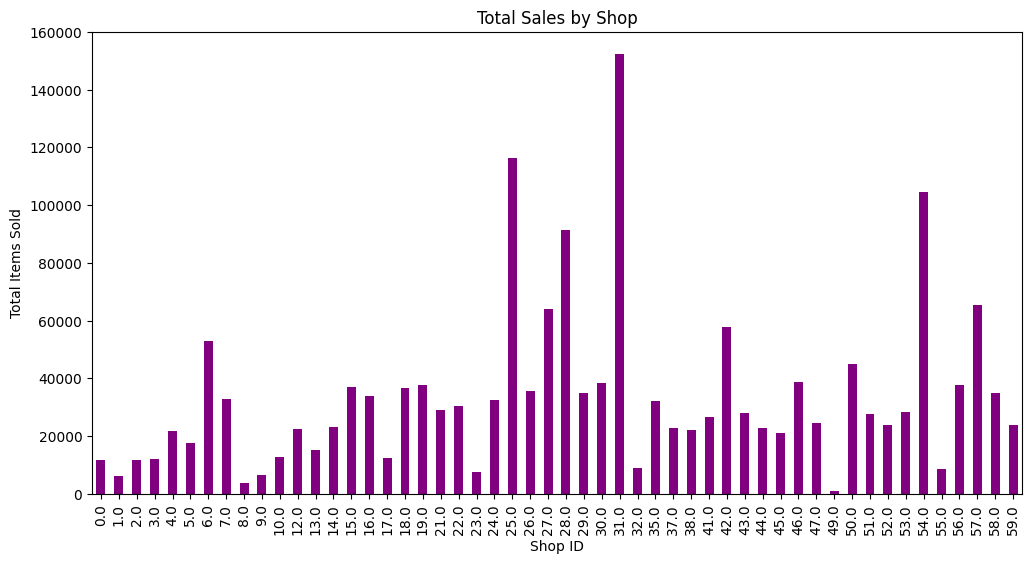

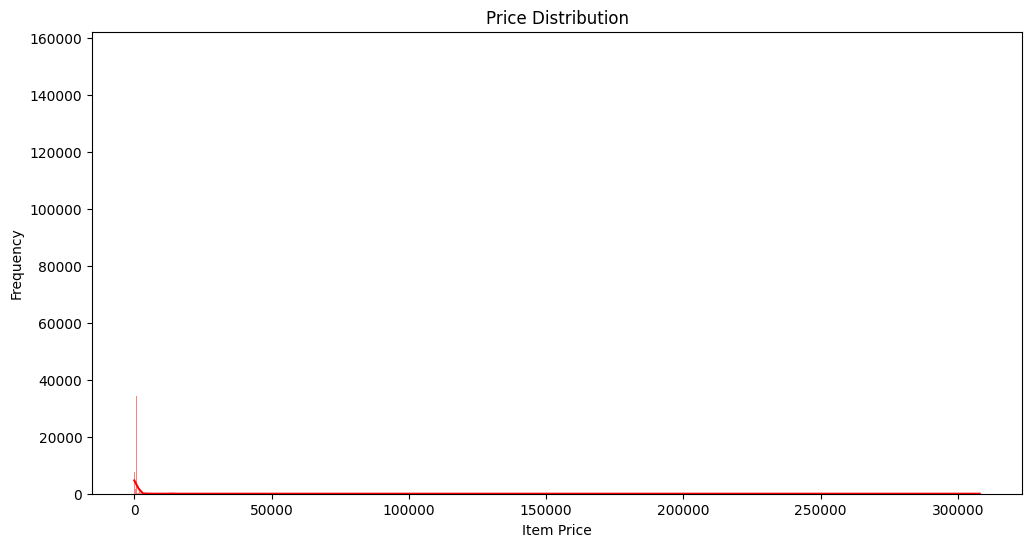

Data after cleaning (no outliers, negative values):
        date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02             0.0     59.0  22154.0      999.00           1.0   
1 2013-01-03             0.0     25.0   2552.0      899.00           1.0   
3 2013-01-06             0.0     25.0   2554.0     1709.05           1.0   
4 2013-01-15             0.0     25.0   2555.0     1099.00           1.0   
5 2013-01-10             0.0     25.0   2564.0      349.00           1.0   

   month  
0      1  
1      1  
3      1  
4      1  
5      1  


In [9]:
## 5. Total sales by shop
shop_sales = sales_data.groupby('shop_id')['item_cnt_day'].sum()

# Plotting sales by shop
plt.figure(figsize=(12,6))
shop_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Shop')
plt.ylabel('Total Items Sold')
plt.xlabel('Shop ID')
plt.show()

## 6. Sales Price Distribution
plt.figure(figsize=(12,6))
sns.histplot(sales_data['item_price'], kde=True, color='red')
plt.title('Price Distribution')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

# Outliers Detection using Z-Score
from scipy import stats

z_scores = np.abs(stats.zscore(sales_data[['item_price', 'item_cnt_day']]))
outliers = (z_scores > 3).all(axis=1)
sales_data_no_outliers = sales_data[~outliers]

# Display the cleaned data (no negative prices, no negative sales)
print(f"Data after cleaning (no outliers, negative values):\n{sales_data_no_outliers.head()}")